# Percentiles, Credible Intervals, and Error Bars

Suppose that we have a continuous random variable $x$ defined on the real line $x \in (-\infty, \infty)$ which is described by a probability density $P(x)$. In statistics, not only do we want to be able to calculate things like the mean, median and standard deviation of a distribution, but we often want to make statements such as "there is a 68% probability that $x$ lies between $x_1$ and $x_2$. The interval $x_1 \leq x \leq x_2$ is called a **credible interval** or a **confidence interval** (depending on the context).  Let $Q$ be the probability that we have chosen to define our credibile interval (i.e. the 68%). To compute the credibile interval mathematically, we write
$$
Q = P(x_1 \leq x \leq x_2) = \int_{x_1}^{x_2} P(x) dx. 
$$
Recall that the cumulative distribution function (CDF) is defined as
$$
{\rm CDF}(\leq x) = \int_{-\infty}^x P(x') dx', 
$$
and note that
$$
\begin{align}
{\rm CDF}(\leq x_2) - {\rm CDF}(\leq x_1) =& \int_{-\infty}^{x_2} P(x') dx' - \int_{-\infty}^{x_1} P(x') dx'\nonumber\\
=& \int_{-\infty}^{x_1} P(x') dx' + \int_{x_1}^{x_2} P(x') dx' - \int_{-\infty}^{x_1} P(x') dx'\nonumber\\
=& \int_{x_1}^{x_2} P(x') dx' = P(x_1 \leq x \leq x_2) = Q.\nonumber
\end{align}
$$
and hence
$$
Q = P(x_1 \leq x \leq x_2) = {\rm CDF}(\leq x_2) - {\rm CDF}(\leq x_1).
$$
But note that the equation above is not enough to uniquely define $x_1$ and $x_2$, because it can be satified by many different combinations of $x_1$ and $x_2$ (i.e. we have one constraint $Q$ and two unknowns $x_1$ and $x_2$).

While there are multiple ways/conventions to break this degeneracy and define the credible interval, a common practice is to choose $x_1$ and $x_2$ such that the probability that $x$ lies below $x_1$ is the same as the probability that $x$ lies above $x_2$. If $Q$ is the total probability that $x_1 \leq x \leq x_2$, then there is $1-Q$ probability left lying outside that interval and splitting it equally implies:
$$
\begin{align}
\frac{1}{2}(1-Q) =& P(x \leq x_1) = \int_{-\infty}^{x_1} P(x) dx = {\rm CDF}(\leq x_1)\nonumber\\
& \quad\quad\quad\quad\quad\quad \text{and}\nonumber\\
\frac{1}{2}(1-Q) =& P(x \geq x_2) = \int_{x_2}^{\infty} P(x) dx = \int_{-\infty}^{\infty} P(x) dx  - \int_{-\infty}^{x_2} P(x) dx = 1 - {\rm CDF}(\leq x_2)\nonumber.
\end{align}
$$
You can easily show that taking the sum of these equations gives $Q = {\rm CDF}(\leq x_2) - {\rm CDF}(\leq x_1)$, as required. 
The equations above can be solved for $x_1$ and $x_2$ by inverting the CDF 
$$
\begin{align}
x_1 =& {\rm CDF}^{-1}\left(\frac{1}{2}(1-Q)\right)\nonumber\\
x_2 =& {\rm CDF}^{-1}\left(\frac{1}{2}(1+Q)\right)\nonumber
\end{align}
$$

Note that similar to our discussion of the mean, median, and standard deviation, there are two ways to compute the credible interval bounds. The first way is to operate directly on samples from the distribution, and the second way is to use the CDF. We will illustrate both methods below for the case of the Gaussian distribution.



## Example: Compute the 68% Credible Interval for the Gaussian Distribution

Recall the Gaussian distribution is defined by the probability density
$$
\mathcal{N}(x| \mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right],
$$
where $\mu$ is the mean of $x$ and $\sigma$ is the standard deviation.

First we can use `np.percentile` to compute the credible interval directly from samples from the distribution.

In [1]:
import numpy as np
from scipy import stats

seed=42
rng = np.random.default_rng(seed)
x = rng.normal(loc=0.0, scale=1.0, size=(1000000,))

Q=0.68
Q_1 = (1-Q)/2 # 0.16
Q_2 = (1+Q)/2 # 0.84
x_1 = np.percentile(x, Q_1*100.0)
x_2 = np.percentile(x, Q_2*100.0)

# Print out the credible interval for the 68% confidence level
print(f'The 68% credible interval: {x_1:.4f} <= x <= {x_2:.4f}]')
print(Q_1, Q_2)

The 68% credible interval: -0.9937 <= x <= 0.9943]
0.15999999999999998 0.8400000000000001


Second,  we can use the CDF.  This is easiest to do with `scipy.stats`. 

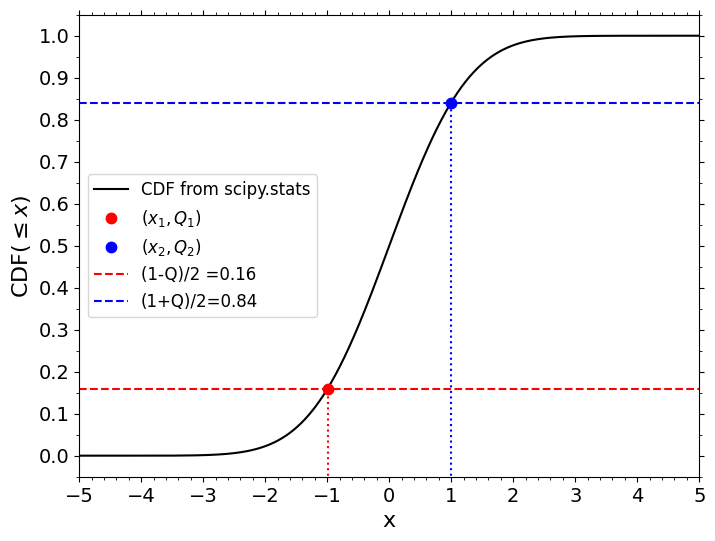

In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

mu =0
sigma = 1.0

# Scipy actual has a function that inverts the cdf for us called the precent point function (ppf):
#  PPF(Q) = CDF^{-1}(Q)
x_1_ppf = stats.norm.ppf(Q_1, loc=mu, scale=sigma)
x_2_ppf = stats.norm.ppf(Q_2, loc=mu, scale=sigma)

# Compute the cumulative distribution function from scipy.stats
x_fine = np.linspace(-6, 6, 1000)
cdf_scipy = stats.norm.cdf(x_fine, loc=mu, scale=sigma)

# Create a figure and an axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the cumulative distribution function from scipy.stats
ax.plot(x_fine, cdf_scipy, 'k-', label='CDF from scipy.stats')

# Add labels and legend
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel(r'${\rm CDF}(\leq x)$', fontsize=16)

# Plot points and lines
ax.plot([x_1_ppf], [Q_1], 'r.', markersize=15, label=r'$(x_1, Q_1)$')
ax.plot([x_2_ppf], [Q_2], 'b.', markersize=15, label=r'$(x_2, Q_2)$')
ax.axhline(Q_1, color='r', linestyle='--', label='(1-Q)/2 =0.16')
ax.axhline(Q_2, color='b', linestyle='--', label='(1+Q)/2=0.84')
ax.plot([x_1_ppf,x_1_ppf], [-5, Q_1], color='r', linestyle=':')
ax.plot([x_2_ppf,x_2_ppf], [-5, Q_2], color='b', linestyle=':')

# Set tick locators
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.1))

# Set limits
ax.set_xlim(-5, 5)
ax.set_ylim(-0.05, 1.05)
# Add legend
ax.legend(loc='center left', fontsize=12)

# Some tick mark things
ax.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labelsize=14)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(MultipleLocator(0.05))



It is not a coincidence that we found that $x_1 = -1$ and $x_2=1$ for the Gaussian distribution with $\mu=0$ and $\sigma=1$. Indeed, the probability level $Q=0.68$, 
or the 68% credibility level is often quoted because it is the probability that a random variable drawn from a Gaussian distribution (with $\mu=0$ and $\sigma=1$) lies within one standard deviation of the mean.  Because the Gaussian distribution is so common, it sets the *standard* for the credibility levels ($Q$) that are commonly quoted, and the **error bars** that we quote and plot on measurements. 

As illustrated in the figure below, for a Gaussian:
- The mean $\mu$ is equal to the median which is also equal to the mode. 
- 68% of the values lie within one standard deviation $\sigma$ of the mean $\mu$.
- 95% of the values lie within two standard deviations $2\sigma$ of $\mu$.
- 99.7% are within three standard deviations $3\sigma$ of $\mu$.

<img src="figures/gaussian_wikipedia.png" width="800">

We can verify these numbers with `scipy.stats`. 

In [3]:
mu = 0.0
sigma = 1.0

# Create a normal distribution object with parameters mu and sigma
dist = stats.norm(loc=mu, scale=sigma)
# Compute the cumulative distribution function of the Gaussian at  mu - sigma and mu + sigma
lower_percentile_16 = 100*dist.cdf(mu - sigma) # 15.9% of the probability below mu - sigma
upper_percentile_84 = 100*dist.cdf(mu + sigma) # 84.1% of the probability below mu + sigma

lower_percentile_2pt3 = 100*dist.cdf(mu - 2.0*sigma) # 2.3% of the probability below  mu - 2*sigma
upper_percentile_97pt7 = 100*dist.cdf(mu + 2.0*sigma) # 97.7% of the probability below mu + 2*sigma


print(f'CDF(mu - sigma)={lower_percentile_16:.3f}')
print(f'CDF(mu + sigma)={upper_percentile_84:.3f}')
print(f'Bewteen mu - sigma and mu + sigma={upper_percentile_84 - lower_percentile_16:.3f}')
print(f'CDF(mu - 2*sigma)={lower_percentile_2pt3:.3f}')
print(f'CDF(mu + 2*sigma)={upper_percentile_97pt7:.3f}')
print(f'Bewteen mu - 2*sigma and mu + 2*sigma={upper_percentile_97pt7 - lower_percentile_2pt3:.3f}')

CDF(mu - sigma)=15.866
CDF(mu + sigma)=84.134
Bewteen mu - sigma and mu + sigma=68.269
CDF(mu - 2*sigma)=2.275
CDF(mu + 2*sigma)=97.725
Bewteen mu - 2*sigma and mu + 2*sigma=95.450


These common percentiles provide a standard way for summarizing physical measurements. In Week5 we discussed the idea of making a plot with error bars. 
For example if we make measurements of a quantity ${\hat x}$ that is noisy, and the noise follows a Gaussian distribution (a common occurence), then
$$
P(x) = \mathcal{N}(x|{\hat x}, \sigma_{x}), 
$$
where we take $\mu={\hat x}$ to be the mean and $\sigma_{x}$ is the standard deviation that comes from say our measurement apparatus. 

In this case, a concise summary of our measurement is to adopt the notational convention
$$
x = {\hat x} \pm \sigma_{x}, 
$$
which is a shorthand for 
$$
\langle x \rangle = {\hat x} 
$$
and that there is a 68% probability that $x$ lies in the range 
$$
{\hat x} - \sigma_{x} \leq x \leq {\hat x} + \sigma_{x}.
$$
Note however, that this notation might also imply
$$
x_{\rm median} = {\hat x}, 
$$
which is equiavelent for a Gaussian distribution since $x_{\rm median} = \langle x \rangle = x_{\rm mode} = \mu$.  The plus and minus values defined in this way are also the **error bars** that you would use if you were plotting such noisy data (see Week5 lecture).

## Example: The Non-Gaussian US Income Distribution

Even if a distribution is not Gaussian, it is common to use a standard set of percentiles and credible interval probabilies, $Q$,  to describe the spread of the distribution.  For example, consider our US income distribution, which is not Gaussian.  We can nevertheless compute its 16th, 50th, and 84th percentile incomes, to get a feeling for how the distribution behaves. For a Gaussian distribution, the 16th, 50th, and 84th percentiles correspond to the mean/median/mode (they are the same for a Gaussian) minus/plus the standard deviation. This will not be the case for a non-Gaussian distribution like the US income distribution, but we can still compute these percentiles and use them to describe the distribution.

As we saw with computing the median above, we can either compute percentiles directly from a set of random samples (a dataset), or we can compute them via the cumulative distribution function (CDF), i.e. either by integrating a probability distribution or summing a histogram.  Here are examples of both: 

In [4]:
# Generate our fake US census income data
from Phys29.lectures.Week7.census_utils import generate_fake_census_data
incomes = generate_fake_census_data()

# Compute percentiles directly from the data. Use the np.percentile function
income_16 = np.percentile(incomes, lower_percentile_16)
income_50 = np.percentile(incomes, 50.0) # This is equivalent to taking the median with np.median
income_84 = np.percentile(incomes, upper_percentile_84)
print(f'16th-50th-84th percentiles from samples: ${income_16:.0f}, ${income_50:.0f}, ${income_84:.0f}')

16th-50th-84th percentiles from samples: $25049, $73000, $165900


Alternatively, we can use the cumulative distribution function analogous to what we did previously with the median. 

In [5]:
# Construct the bins of the histogram 
bin_width = 10000
# Maximum value is 2,481,200, so go up to 2.5 million
I_edges = np.arange(0, 2500000, bin_width)

# Compute the histogram. Use the weights argument given how the census data is provided. 
N_of_I, _ = np.histogram(incomes, bins=I_edges)
I_centers = (I_edges[1:] + I_edges[:-1])/2
P_of_I = N_of_I / np.sum(N_of_I) # Normalize the histogram to get the probability density function

P_cumulative = np.cumsum(P_of_I) 
# Cumsum means P_cumulative[0] = P_of_I[0], P_cumulative[1] = P_of_I[0] + P_of_I[1], etc.
k_16 = np.argmax(P_cumulative > lower_percentile_16/100)
k_med = np.argmax(P_cumulative > 0.5) 
k_84 = np.argmax(P_cumulative > upper_percentile_84/100)
I_16 = I_centers[k_16]
I_median = I_centers[k_med]
I_84 = I_centers[k_84]
print(f'16th-50th-84th percentiles from CDF: ${I_16:.0f}, ${I_median:.0f}, ${I_84:.0f}')

16th-50th-84th percentiles from CDF: $25000, $75000, $165000


Note however that in this case the 16th and 84th percentiles are not symmetric about the median, and if we want to summarize this distribution with the convention we used above, we cannot use the $\pm$ notation. Based on what we found above for the percentiles, we might instead write: 
$$
{\rm income} = \$73,000_{-47,951}^{+92,900}. 
$$
Because the 16th-50th-84th percentiles,  \$25,049, \$73,000, \$165,900$, are not symmetric about the median, we quote an assymetric error bar. 

However, one needs to be  careful to specify what exactly is meant by the notation. For example: 

In [6]:
# Generate our fake US census income data
from Phys29.lectures.Week7.census_utils import generate_fake_census_data
income_mean = np.mean(incomes)
income_std = np.std(incomes)
print(f'Mean, std. deviation = ${income_mean:.0f}, {income_std:.0f}')
print('Compare to:')
print(f'16th-50th-84th percentiles from samples: ${income_16:.0f}, ${income_50:.0f}, ${income_84:.0f}')

Mean, std. deviation = $102985, 113410
Compare to:
16th-50th-84th percentiles from samples: $25049, $73000, $165900


One might instead choose to summarize this data as 
$$
{\rm income} = \langle i\rangle \pm \sigma_i =  \$102,985 \pm \$ 113,410, 
$$
where $\langle i\rangle$ is the mean income and $\sigma_i$ is the standard deviation. Note that this is different from the 16th-50th-84th percentiles
that we quoted before 
$$
{\rm income} = \$73,000_{-47,951}^{+92,900}, 
$$
which containted 68\% of the probability. Furthermore note that the fraction of the total probability contained in the interval
$ \langle i \rangle - \sigma_i \leq i \leq \langle i \rangle + \sigma_i$ **is not 68\%.** What fraction of the US income distribution lies in the range $\langle i \rangle - \sigma_i \leq i \leq \langle i \rangle + \sigma_i$? This is just
$$
{\rm CDF}(\leq \langle i \rangle + \sigma_i) - {\rm CDF}(\leq \langle i \rangle - \sigma_i) = \int_{\langle i \rangle - \sigma_i}^{\langle i \rangle + \sigma_i} P(i) di.
$$

In [7]:
i_min = income_mean - income_std
i_max = income_mean + income_std
cumulative_frac = np.sum((incomes >= i_min) & (incomes <= i_max))/len(incomes)
print(f'In the range ${i_min:.0f} <= i <= ${i_max:.0f} we have {cumulative_frac:.2f} of the probability')

In the range $-10425 <= i <= $216395 we have 0.91 of the probability
